# Gelman Schools

An example from [the `PyMC3` docs](https://github.com/pymc-devs/pymc3/blob/master/pymc3/examples/gelman_schools.py).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st

from utils import plt, sns

In [2]:
# Example data
data = np.array([28,  8, -3,  7, -1,  1, 18, 12])
sigma = np.array([15, 10, 16, 11,  9, 11, 10, 18])

In [3]:
with pm.Model() as model:
    # Priors
    alpha_mu = pm.Normal("alpha_mu", 0, 1)
    alpha_sigma = pm.HalfCauchy("alpha_sigma", 5)
    alpha = pm.Normal("alpha", mu=alpha_mu, sd=alpha_sigma)

    beta = pm.Normal("beta", mu=0, sd=10, shape=len(data))
    tau = pm.HalfCauchy("tau", 5)

    theta = alpha + beta * tau

    # Likelihood
    y = pm.Normal("y", mu=theta, sd=sigma, observed=data)

    # Sample
    trace = pm.sample(draws=5000, njobs=4, chain=4)

burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -34.92: 100%|██████████| 200000/200000 [00:14<00:00, 13820.81it/s] 
Finished [100%]: Average ELBO = -34.972
100%|██████████| 5000/5000 [00:25<00:00, 192.98it/s]


                 mean         sd  mc_error    hpd_2.5   hpd_97.5
alpha_mu     0.171981   0.993345  0.010681  -1.777339   2.074613
alpha        4.110665   4.030595  0.070094  -2.450674  12.544670
beta__0      4.665902   9.385081  0.091508 -14.610258  22.001647
beta__1      1.409085   8.560272  0.082631 -16.180615  18.006414
beta__2     -1.137588   9.190817  0.080806 -19.972256  16.011583
beta__3      0.898360   8.752448  0.073286 -15.927319  18.858952
beta__4     -1.932340   8.714136  0.092006 -18.877706  15.779693
beta__5     -0.847865   8.951107  0.080006 -19.339644  16.316405
beta__6      4.758709   8.960738  0.079369 -14.088167  21.349473
beta__7      1.246622   9.339213  0.086194 -17.239049  19.418642
alpha_sigma  8.016972  18.783558  0.256324   0.029612  22.303997
tau          0.625851   0.517772  0.007445   0.000200   1.614622


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162a7a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a024350>]], dtype=object)

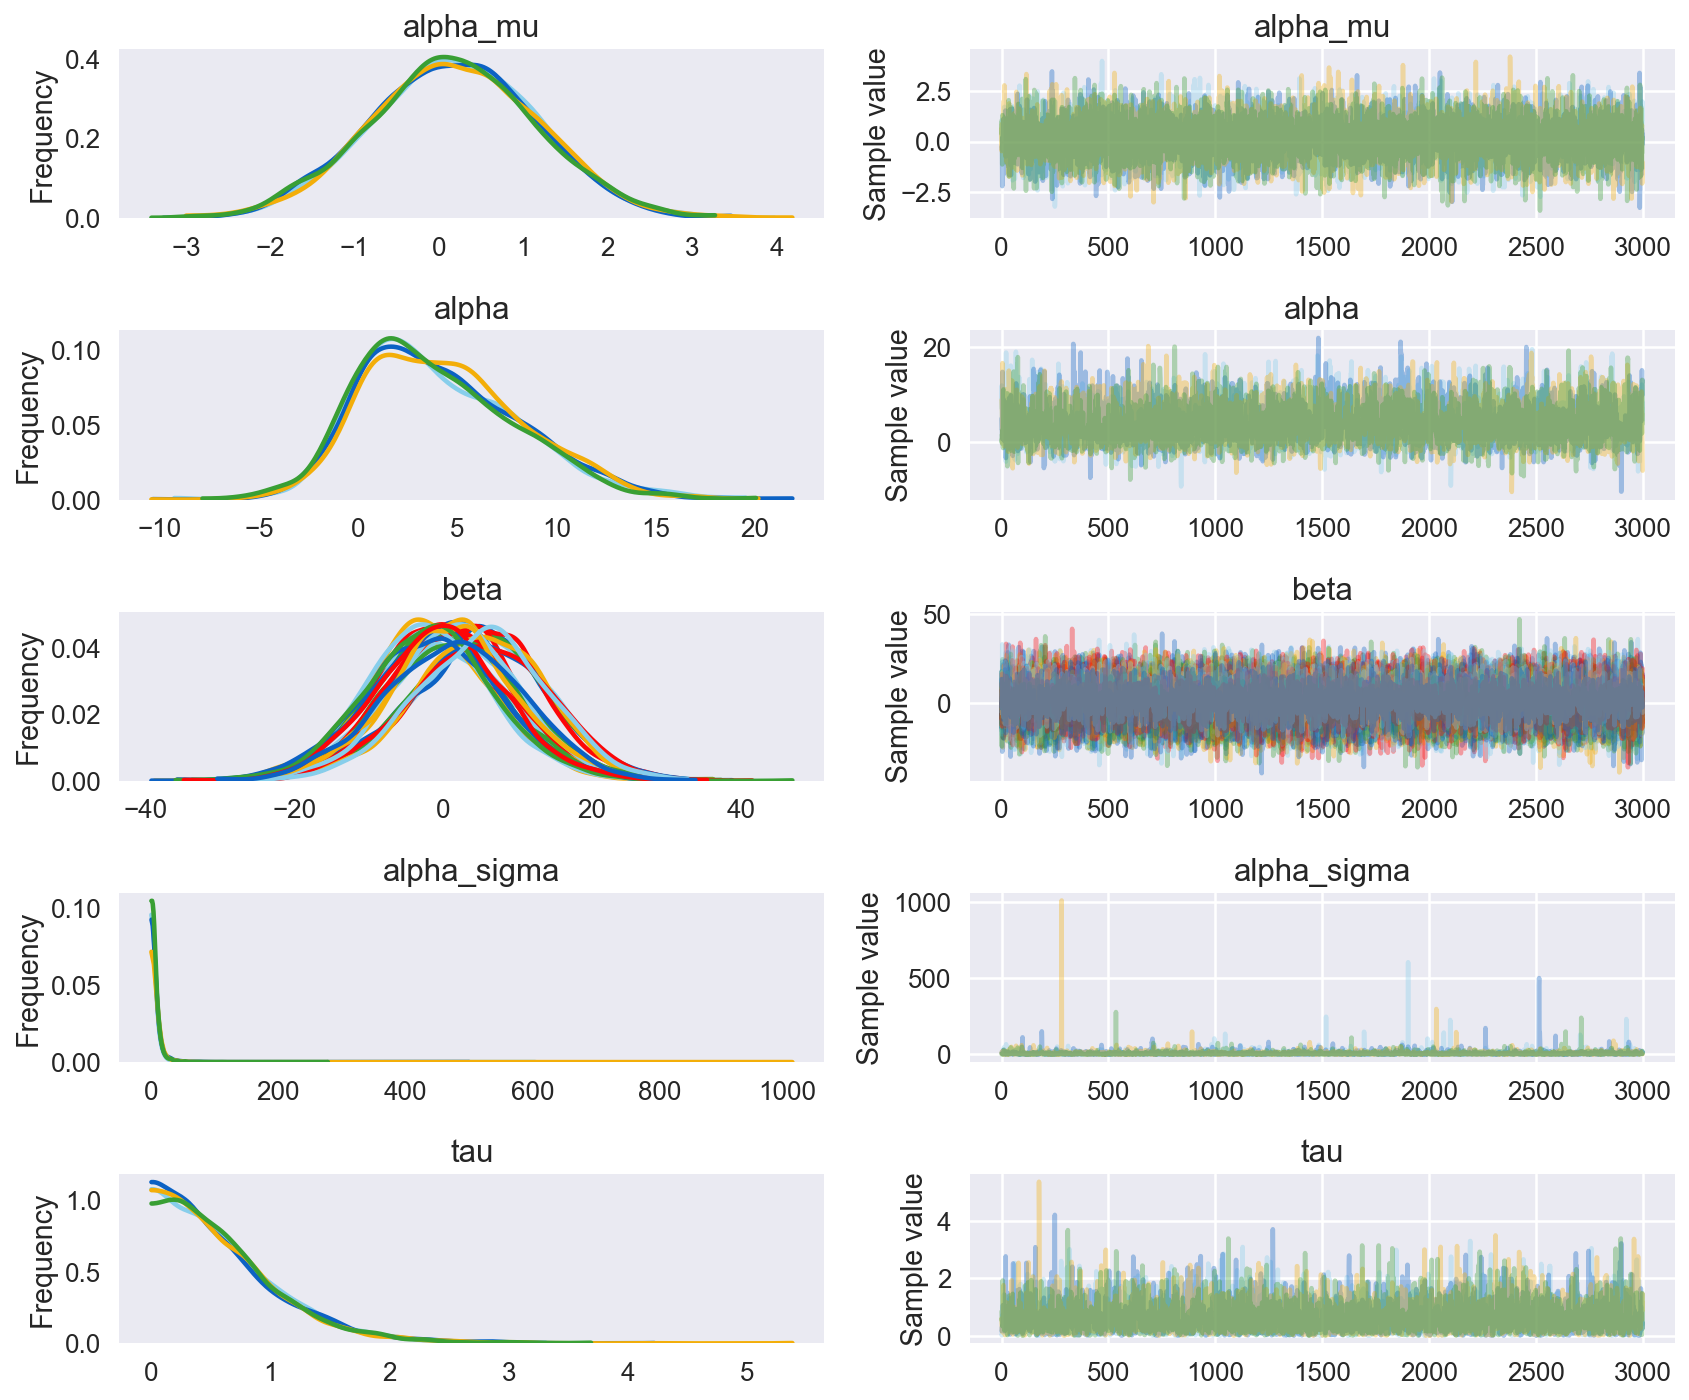

In [4]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1170ceb90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1149990d0>], dtype=object)

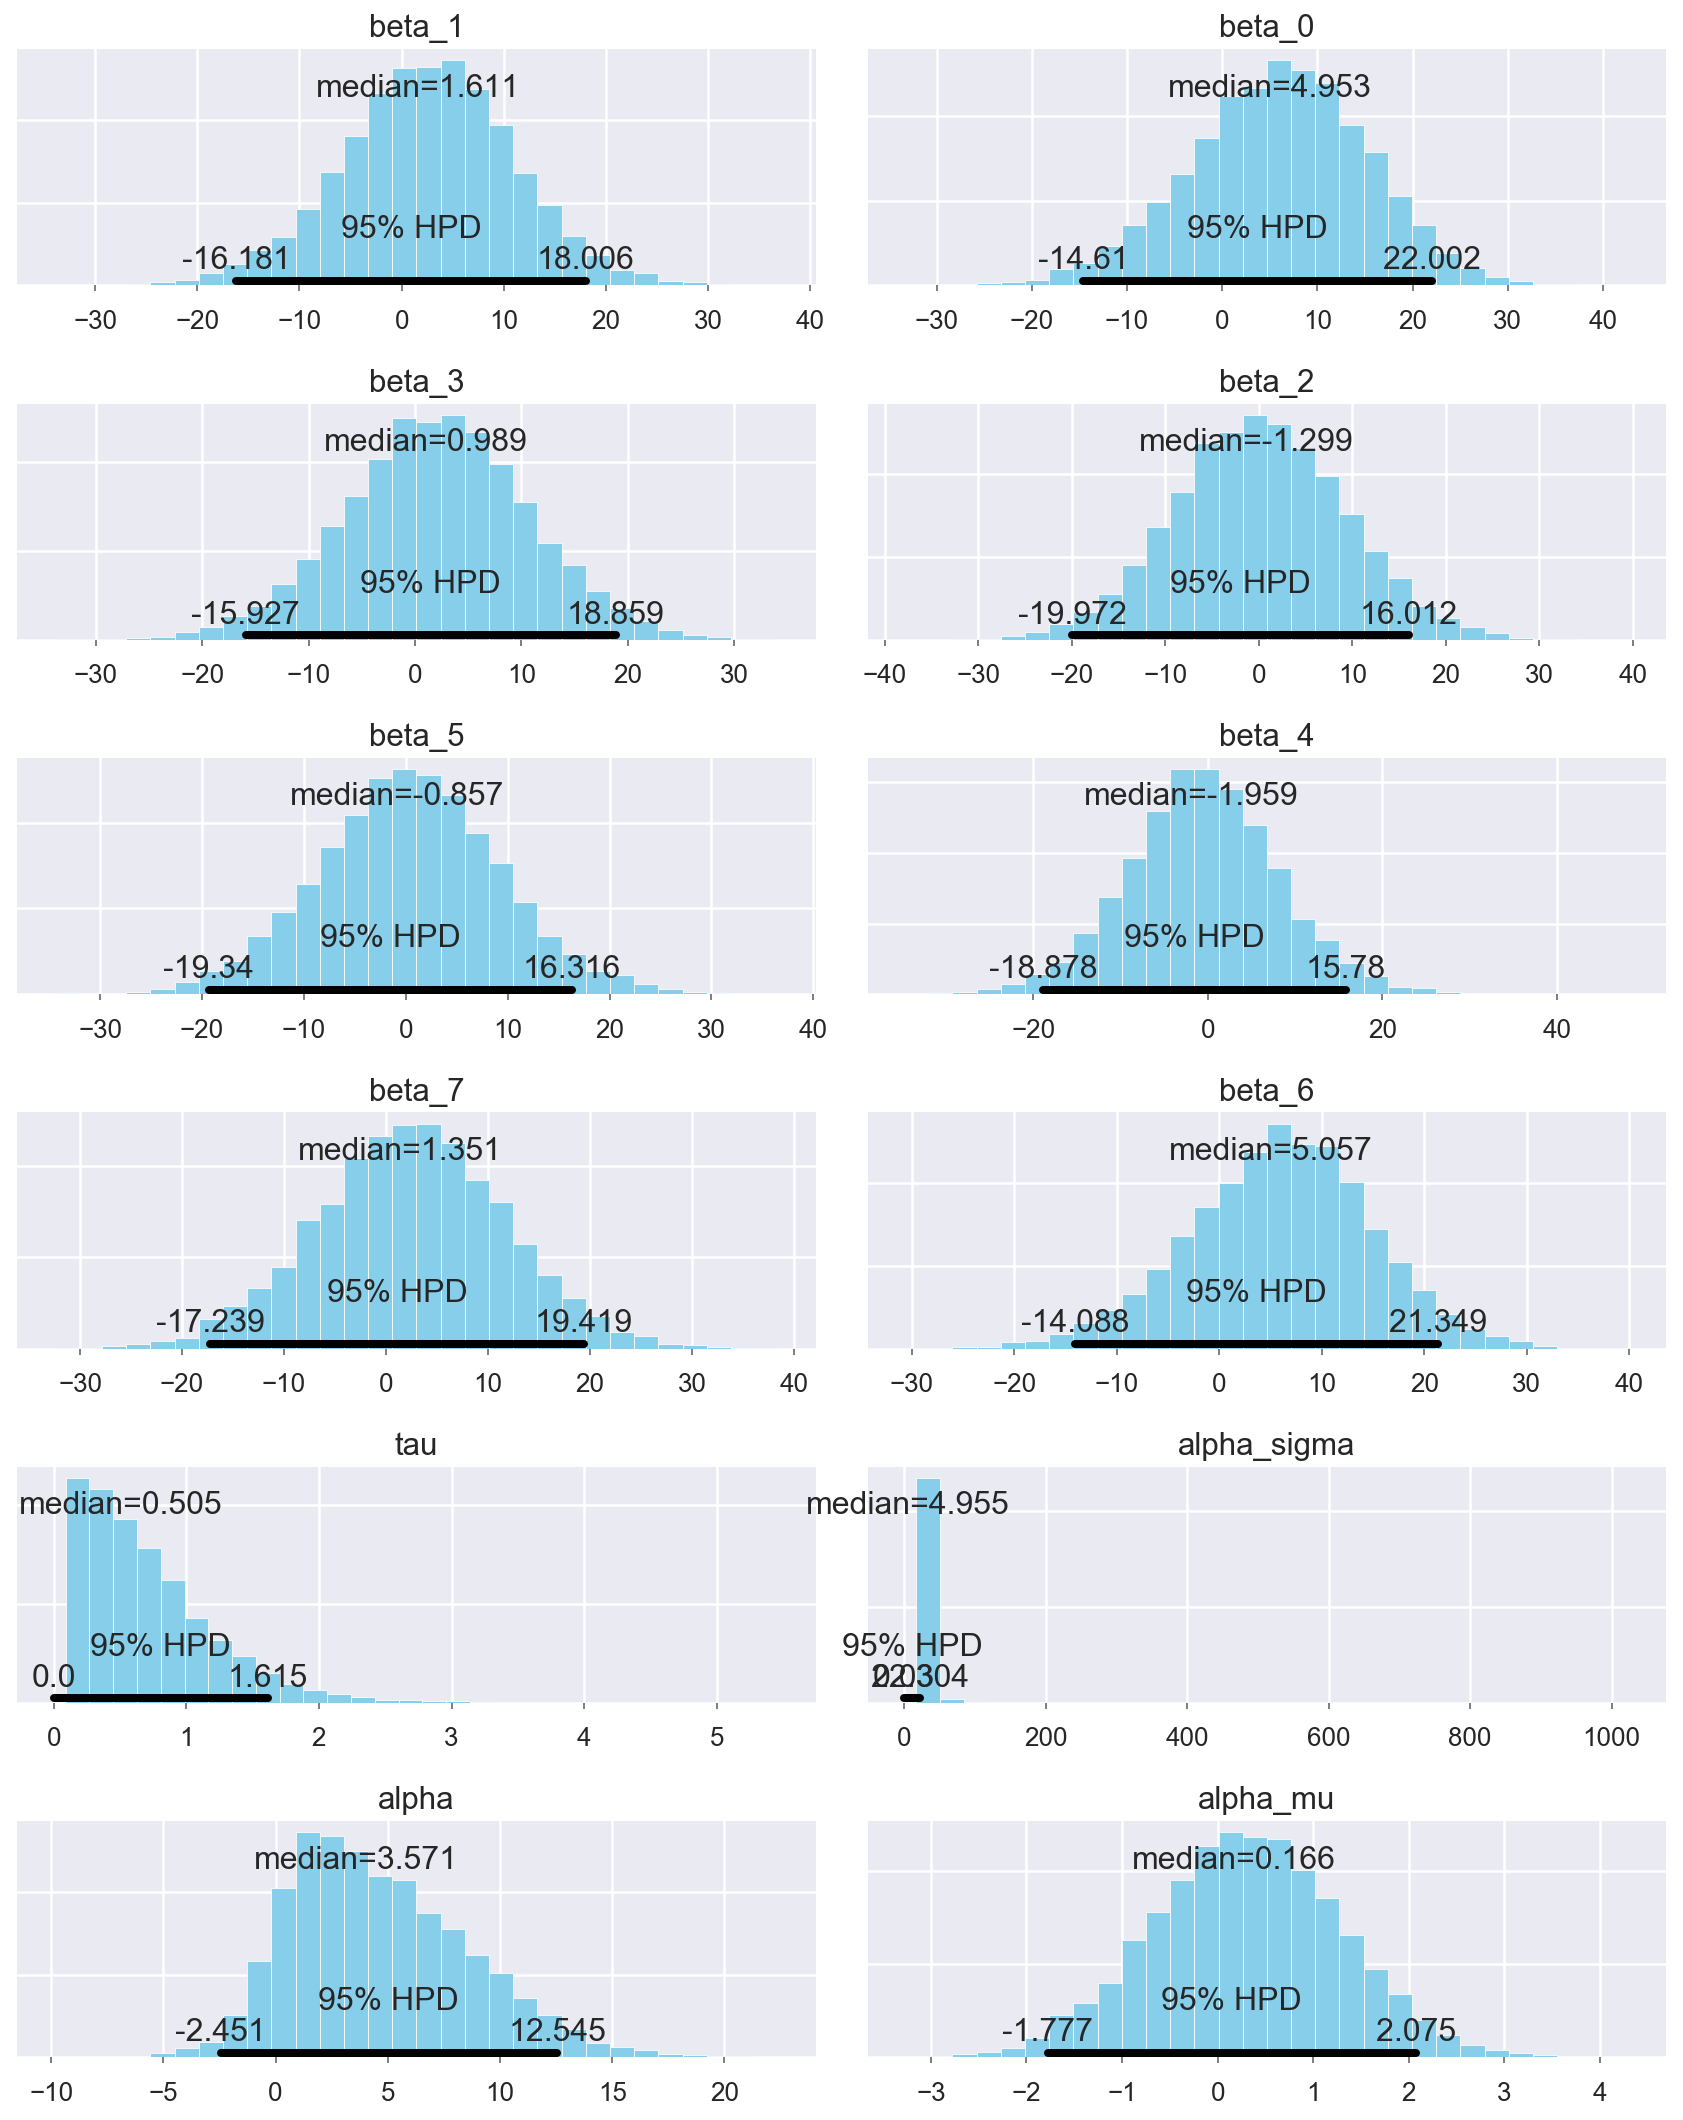

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'alpha': 1.0015636351670534,
 'alpha_mu': 1.0002232212816256,
 'alpha_sigma': 1.0002688301622058,
 'alpha_sigma_log_': 1.0012687916550929,
 'beta': array([ 0.99992924,  1.00040129,  1.00011235,  1.00012008,  1.00019811,
         1.0002532 ,  1.00002933,  0.99993869]),
 'tau': 0.99990053682005464,
 'tau_log_': 1.000435954316635}